For the chart you are interested in the median price comparison of ['unit'] in the suburb/s ['COOGEE', 'DEE WHY', 'MANLY', 'VAUCLUSE', 'WAVERTON'] from the year 2011 to 2020.


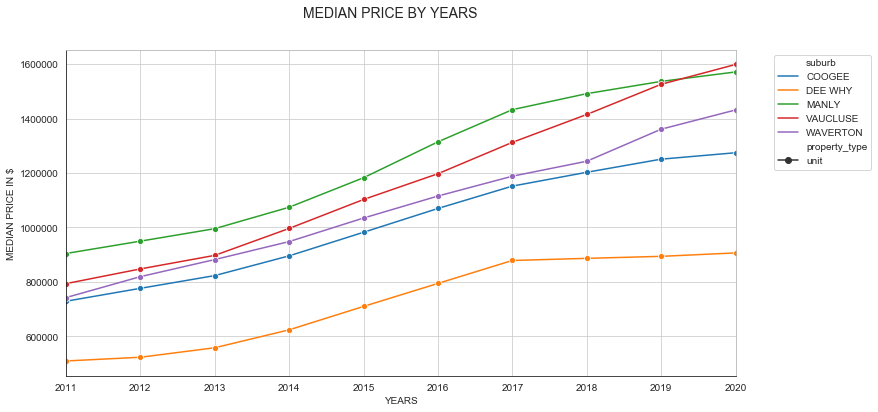

For the map you are interested in the median price of ['house'] from the year 2020.
Map is interactive, please select any blue markers for additional information.


In [4]:
###START OF NOTEBOOK###
#=====================================LIBRARY INSTALL & LOADING===============================#START

###PLEASE INSTALL ALL REQUIRED LIBRARIES BY REMOVING THE COMMENT TAG IF NECESSARY
#!pip install matplotlib
#!pip install seaborn
#!pip install folium
#!pip install branca

###Python Libraries that are required to run this notebook are loaded in this segment of code
import numpy as np              ###Importing NumPy libary for data array processing
import pandas as pd             ###Importing Pandas libary for data manipulation and analysis
import seaborn as sns           ###Importing Seaborn libary for plotting and data visualization
import matplotlib.pyplot as plt ###Importing Mathplotlib libary for plotting data
import folium                   ###Importing Folium libary for interactive loaflet maps
import branca                   ###Importing Branca libary for adding HTML and CSS support to Folium

#=====================================LIBRARY INSTALL & LOADING===============================#END

#==============================LINEPLOT DATAFRAME LOAD & CLEANUP==============================#START

###MedianPrice dataframe is loaded, cleaned, date-time parsed, grouped and index is reset to make dataframe ready for the lineplot

###Location of .xlsx file must be in root folder of notebook location
df = pd.read_excel('nsw_suburb_median_price_2007-2020.xlsx', parse_dates = ["qtr"])

###Rename columns of dataframe
df = df.rename(columns = {"qtr": "year"})

###Drop NaN values
df = df.dropna()

###Parse date-time to read years only
df['year'] = df.year.dt.year

###Grouping dataframe to rearrange according to our needs
df = (df.groupby(['state', 'suburb', 'postcode', 'property_type', 'year'])[['median_price']].mean())

###Resetting dataframe index after grouping
df2 = df.reset_index()

#==============================LINEPLOT DATAFRAME LOAD & CLEANUP==============================#END

#=====================================USER INPUT SECTION======================================#START

###User input for the line-plot
start_year = 2011   #PLEASE SPECIFY YEAR FOR START OF CHART --- AVAILABLE OPTIONS 2008 to 2020 FOR THIS DATA SET
end_year = 2020     #PLEASE SPECIFY YEAR FOR END OF CHART --- AVAILABLE OPTIONS 2008 to 2020 FOR THIS DATA SET
interested_suburb = ['BONDI', 'COOGEE', 'DEE WHY', 'MANLY', 'VAUCLUSE', 'WAVERTON']    #PLEASE SPECIFY ONE OR MILTIPLE SUBURBS --- WITHIN '' AND SEPERATED BY ,
interested_property_type = ['house', 'unit']   #PLEASE SPECIFY PROPERTY TYPE --- AVAILABLE OPTIONS house OR unit CAN BE BOTH --- WITHIN '' AND SEPERATED BY ,
###Do not edit the next line
statement_to_print1 = "For the chart you are interested in the median price comparison of {} in the suburb/s {} from the year {} to {}.".format(interested_property_type, interested_suburb, start_year, end_year)

###User input for the interactive map
m_year = 2020   #PLEASE SPECIFY YEAR FOR MAP --- AVAILABLE OPTIONS 2008 to 2020 FOR THIS DATA SET
m_property_type = ['house']   #PLEASE SPECIFY PROPERTY TYPE --- AVAILABLE OPTIONS house OR unit MUST BE EITHER ONE --- WITHIN ''
###Do not edit the next line
statement_to_print2 = "For the map you are interested in the median price of {} from the year {}.".format(m_property_type, m_year)

#=====================================USER INPUT SECTION======================================#END

#=======================================LINE PLOT CODE========================================#START

###Define range and data types for line plot
df2 = df2.loc[(df2['year'] >= start_year) & (df2['year'] <= end_year)]
df2 = df2.loc[df2['suburb'].isin(interested_suburb)]
df2 = df2.loc[df2['property_type'].isin(interested_property_type)]

###Define line plot style and set dataframe to plot
fig, ax = plt.subplots(figsize = (12, 6))
ax = sns.lineplot(x = "year", y = "median_price", hue = "suburb", 
                  style = "property_type", data = df2, 
                  markers=True)
sns.set_style('whitegrid')
fig.suptitle('MEDIAN PRICE BY YEARS', fontsize = 14)
ax.set(xlabel='YEARS', ylabel='MEDIAN PRICE IN $')
ax.spines['bottom'].set_color("0.1")
ax.spines['top'].set_color("0.7")
ax.spines['right'].set_color("0.7")
ax.spines['left'].set_color("0.1")
plt.xlim(2011, 2020)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

###Print user input
print(statement_to_print1)

###Plot line chart
plt.show()

#=======================================LINE PLOT CODE========================================#END

#============================MAP DATAFRAME LOAD MERGE & CLEANUP===============================#START

###Resetting dataframe index
df3 = df.reset_index()

###GeoLocation dataframe is loaded, cleaned,merged to make dataframe ready for the interactive map

###Location of .xlsx file must be in root folder of notebook location
postcode_df = pd.read_excel('australian_postcodes.xlsx')

###Only requred colums of dataframe are selected the rest is dropped
postcode_df = postcode_df[['Postcode', 'Long', 'Lat']]

###Columns are renamed to make suitable for merging dataframes
postcode_df = postcode_df.rename(columns = {
    "Postcode": "postcode",
    "Long": "longitude",
    "Lat": "latitude"
})

###Define year and data type for interactive map
df3 = df3.loc[(df3['year'] == m_year)]
map_df = df3.loc[df3['property_type'].isin(m_property_type)]

###GeoLocation and MedianPrice dataframes are merged using postcode column in a single dataframe and the rest of the data is dropped
final_df = pd.merge(map_df, postcode_df, on = 'postcode').drop_duplicates(['postcode'])

#============================MAP DATAFRAME LOAD MERGE & CLEANUP===============================#END

#==========================HTML CODE FOR FOLIUM MAP POPUP DATASET=============================#START

###Define fuction to cycle through rows of the dataframe
def fancy_html(row):
    i = row

###Define data colums to use for html popup
    suburb = final_df['suburb'].iloc[i]             
    year = final_df['year'].iloc[i]
    property_type = final_df['property_type'].iloc[i]                                           
    median_price = final_df['median_price'].iloc[i]                               

###Define colour of colums for the popup table
    left_col_colour = "#ACACAC"
    right_col_colour = "#E7E7E7"

###Start of html code to define appearance of popup and printing suburb data at the next stage of folium map plot
    html = """<!DOCTYPE html>
<html>
<head>
</head>
<table style="width: 250px;">
<tbody>
<tr>
<td style="width:100px; background-color: """+ left_col_colour +""";">
<span style="font-size: small; font-family: arial">Suburb</td></span>
<td style="background-color: """+ right_col_colour +""";">
<span style="font-size: small; font-family: arial">{}</td>""".format(suburb) + """
</tr>
<tr>
<td style="width:100px; background-color: """+ left_col_colour +""";">
<span style="font-size: small; font-family: arial">Property Type</td></span>
<td style="background-color: """+ right_col_colour +""";">
<span style="font-size: small; font-family: arial">{}</td>""".format(property_type) + """
</tr>
<tr>
<td style="width:100px; background-color: """+ left_col_colour +""";">
<span style="font-size: small; font-family: arial">Median Price</td></span>
<td style="background-color: """+ right_col_colour +""";">
<span style="font-size: small; font-family: arial">${}</td>""".format(median_price) + """
</tr>
<tr>
<td style="width:100px; background-color: """+ left_col_colour +""";">
<span style="font-size: small; font-family: arial">Year</td></span>
<td style="background-color: """+ right_col_colour +""";">
<span style="font-size: small; font-family: arial">{}</td>""".format(year) + """
</tr>
</tbody>
</table>
</html>
"""
    return html

#==========================HTMP CODE FOR FOLIUM MAP POPUP DATASET=============================#END

#==================================FOLIUM MAP PLOT CODE=======================================#START

###Define folium map style, start location zoom level
map = folium.Map(location=[-32.830233, 148.912793], tiles='CartoDB positron',
                zoom_start=6, control_scale=True, prefer_canvas=True)

###Input marker locations to marker plot list
locations = final_df[['latitude', 'longitude']]
locationlist = locations.values.tolist()
len(locationlist)

###Define fuction to cycle through rows of the dataframe
for i in range(0,len(locationlist)):
    
###Load data from dataframe to each individual marker popus and define popup size
    html = fancy_html(i)
    iframe = branca.element.IFrame(html=html,width=280,height=110)
    popup = folium.Popup(iframe,parse_html=True)

###Draw circles to represent each data marker in dataframe with radius of circle set to represent median price of each suburb
    folium.CircleMarker([final_df['latitude'].iloc[i],
                        final_df['longitude'].iloc[i]],
                        radius=final_df.iloc[i]['median_price']*0.000005,
                        fill=True,popup=popup).add_to(map)

###Print user input
print(statement_to_print2)

###Print general statement
print('Map is interactive, please select any blue markers for additional information.')

###Plot folium map
map

#==================================FOLIUM MAP PLOT CODE=======================================#END
###END OF NOTEBOOK###
